In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
# Load the data
beneficiary_data = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv')
inpatient_data = pd.read_csv('DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv') 

Data overview 

In [5]:
beneficiary_data.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,...,2,NaN,0,0,50,10,0,0,0,0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,...,2,NaN,0,0,0,0,0,700,240,0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,2,NaN,0,0,0,0,0,0,0,0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,2,NaN,0,0,0,0,0,0,0,0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,2,NaN,0,0,30,40,0,220,80,0


In [6]:
inpatient_data.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,1.966610e+14,1,20100312.0,20100313.0,2600GD,4000.0,0,3.139084e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,1.962010e+14,1,20090412.0,20090418.0,3900MB,26000.0,0,6.476809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,1.966610e+14,1,20090831.0,20090902.0,3900HM,5000.0,0,6.119985e+08,6.119985e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,1.960910e+14,1,20090917.0,20090920.0,3913XU,5000.0,0,4.971603e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,1.962610e+14,1,20100626.0,20100701.0,3900MB,16000.0,0,6.408400e+09,1.960860e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
beneficiary_data.describe()

,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
count,1.163520e+05,1.814000e+03,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,...,116352.000000,15434.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000,116352.000000
mean,1.936418e+07,2.008065e+07,1.553037,1.284662,25.693740,366.486188,11.143994,10.495514,2.576183,6.826466,...,1.955110,16692.002073,249.053441,99.142258,622.226520,197.502235,25.724182,1162.095881,328.747508,18.355851
std,1.250446e+05,3.493908e+02,0.497181,0.754885,15.582601,266.106008,2.839995,3.758701,4.828831,5.814787,...,0.207063,17309.228111,885.356400,1857.930522,1796.476653,522.437900,370.974324,1587.643182,436.858441,87.356293
min,1.909010e+07,2.008010e+07,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-3000.000000,0.000000,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.928110e+07,2.008030e+07,1.000000,1.000000,10.000000,140.000000,12.000000,12.000000,0.000000,0.000000,...,2.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.936050e+07,2.008070e+07,2.000000,1.000000,25.000000,330.000000,12.000000,12.000000,0.000000,12.000000,...,2.000000,11000.000000,0.000000,0.000000,20.000000,0.000000,0.000000,610.000000,170.000000,0.000000
75%,1.942030e+07,2.008100e+07,2.000000,1.000000,39.000000,560.000000,12.000000,12.000000,0.000000,12.000000,...,2.000000,21000.000000,0.000000,0.000000,550.000000,180.000000,0.000000,1650.000000,480.000000,0.000000
max,1.983120e+07,2.008120e+07,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,12.000000,12.000000,...,2.000000,164220.000000,53096.000000,68000.000000,50020.000000,12450.000000,14400.000000,21160.000000,5260.000000,2110.000000


In [8]:
inpatient_data.describe()

,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,CLM_ADMSN_DT,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
count,6.677300e+04,66773.000000,6.670500e+04,6.670500e+04,64613.000000,66773.000000,6.610000e+04,3.905800e+04,7.683000e+03,6.677300e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.965015e+14,1.001018,2.008846e+07,2.008861e+07,9893.677433,398.899256,5.046059e+09,5.065150e+09,5.062263e+09,2.008846e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.859526e+11,0.031896,7.587457e+03,7.559295e+03,9300.800519,3663.463023,2.931521e+09,2.930776e+09,2.906374e+09,7.587081e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.960110e+14,1.000000,2.007113e+07,2.008010e+07,-8000.000000,0.000000,1.168381e+06,1.159725e+06,8.363090e+05,2.007113e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.962510e+14,1.000000,2.008081e+07,2.008082e+07,4000.000000,0.000000,2.482526e+09,2.482526e+09,2.559218e+09,2.008081e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.965010e+14,1.000000,2.009032e+07,2.009032e+07,7000.000000,0.000000,4.965742e+09,5.039206e+09,5.015526e+09,2.009032e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.967510e+14,1.000000,2.009111e+07,2.009112e+07,11000.000000,0.000000,7.676245e+09,7.640006e+09,7.585165e+09,2.009111e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.969910e+14,2.000000,2.010123e+07,2.010123e+07,57000.000000,68000.000000,9.999956e+09,9.999602e+09,9.999956e+09,2.010123e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(beneficiary_data.shape)
print(inpatient_data.shape)

(116352, 32)
(66773, 81)


#### Cleaning the data 
Replace null values with the mean for measures.

In [10]:
# Identify numerical columns
beneficiary_num_cols = beneficiary_data.select_dtypes(include=[np.number]).columns
inpatient_num_cols = inpatient_data.select_dtypes(include=[np.number]).columns

In [11]:
# Fill NaN values with mean for these columns
beneficiary_data[beneficiary_num_cols] = beneficiary_data[beneficiary_num_cols].apply(lambda x: x.fillna(x.mean()), axis=0)
inpatient_data[inpatient_num_cols] = inpatient_data[inpatient_num_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

In [12]:
# Check if there are any null values left
beneficiary_data.isnull().sum()

DESYNPUF_ID                 0
BENE_BIRTH_DT               0
BENE_DEATH_DT               0
BENE_SEX_IDENT_CD           0
BENE_RACE_CD                0
BENE_ESRD_IND               0
SP_STATE_CODE               0
BENE_COUNTY_CD              0
BENE_HI_CVRAGE_TOT_MONS     0
BENE_SMI_CVRAGE_TOT_MONS    0
BENE_HMO_CVRAGE_TOT_MONS    0
PLAN_CVRG_MOS_NUM           0
SP_ALZHDMTA                 0
SP_CHF                      0
SP_CHRNKIDN                 0
SP_CNCR                     0
SP_COPD                     0
SP_DEPRESSN                 0
SP_DIABETES                 0
SP_ISCHMCHT                 0
SP_OSTEOPRS                 0
SP_RA_OA                    0
SP_STRKETIA                 0
MEDREIMB_IP                 0
BENRES_IP                   0
PPPYMT_IP                   0
MEDREIMB_OP                 0
BENRES_OP                   0
PPPYMT_OP                   0
MEDREIMB_CAR                0
BENRES_CAR                  0
PPPYMT_CAR                  0
dtype: int64

In [13]:
inpatient_data.isnull().sum()

DESYNPUF_ID        0
CLM_ID             0
SEGMENT            0
CLM_FROM_DT        0
CLM_THRU_DT        0
               ...  
HCPCS_CD_41    66773
HCPCS_CD_42    66773
HCPCS_CD_43    66773
HCPCS_CD_44    66773
HCPCS_CD_45    66773
Length: 81, dtype: int64

from dataset description we know (SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD',
    'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA') are chronic disease conditions

In [14]:
# Convert birth date to datetime and calculate age as of today
beneficiary_data['BENE_BIRTH_DT'] = pd.to_datetime(beneficiary_data['BENE_BIRTH_DT'], format='%Y%m%d')
beneficiary_data['Age'] = (datetime.now() - beneficiary_data['BENE_BIRTH_DT']).astype('<m8[Y]')

# Combine chronic condition columns into a single column
chronic_conditions = [
    'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD',
    'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA'
]

# Adding chronic condition to data, 'Chronic_Condition'
beneficiary_data['Chronic_Condition'] = beneficiary_data[chronic_conditions].apply(lambda row: 'Yes' if 1 in row.values else 'No', axis=1)

beneficiary_data.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR', 'Age',
       'Chronic_Condition'],
      dtype='object')

In [15]:
# Merge beneficiary data with inpatient data on DESYNPUF_ID
merged_data = pd.merge(beneficiary_data, inpatient_data, on='DESYNPUF_ID')

merged_data.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       ...
       'HCPCS_CD_36', 'HCPCS_CD_37', 'HCPCS_CD_38', 'HCPCS_CD_39',
       'HCPCS_CD_40', 'HCPCS_CD_41', 'HCPCS_CD_42', 'HCPCS_CD_43',
       'HCPCS_CD_44', 'HCPCS_CD_45'],
      dtype='object', length=114)

#### Demographic Analysis

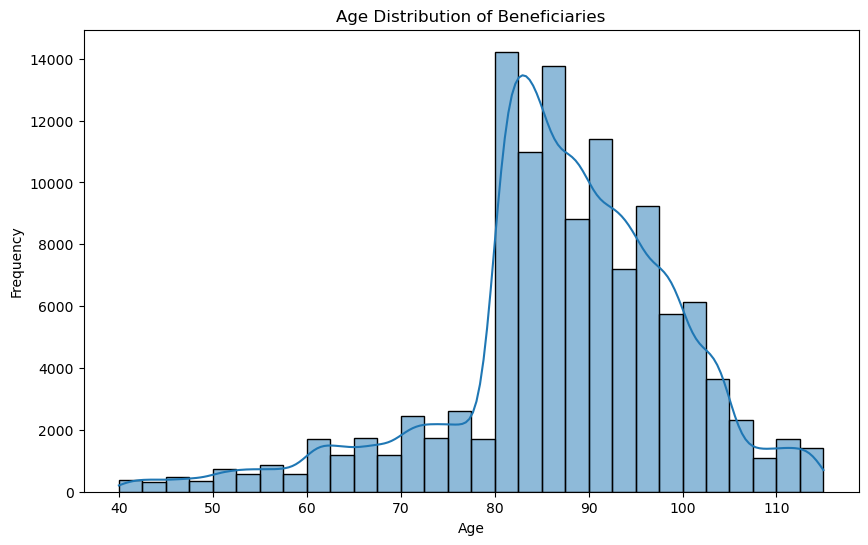

In [16]:
# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(beneficiary_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

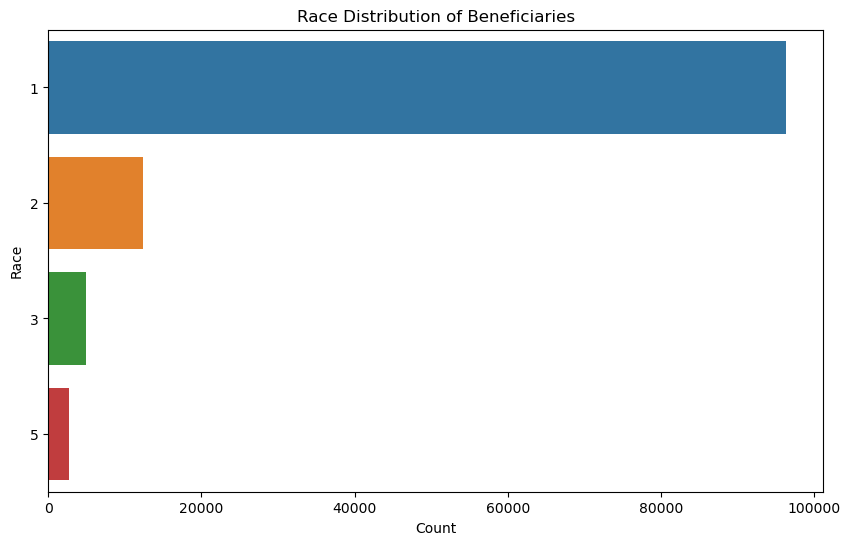

In [17]:
# Distribution of races
plt.figure(figsize=(10, 6))
sns.countplot(y='BENE_RACE_CD', data=beneficiary_data, order=beneficiary_data['BENE_RACE_CD'].value_counts().index)
plt.title('Race Distribution of Beneficiaries')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

#### Scatter plot: Beneficiary age vs Inpatient annual Medicare reimbursement amount by Chronic condition

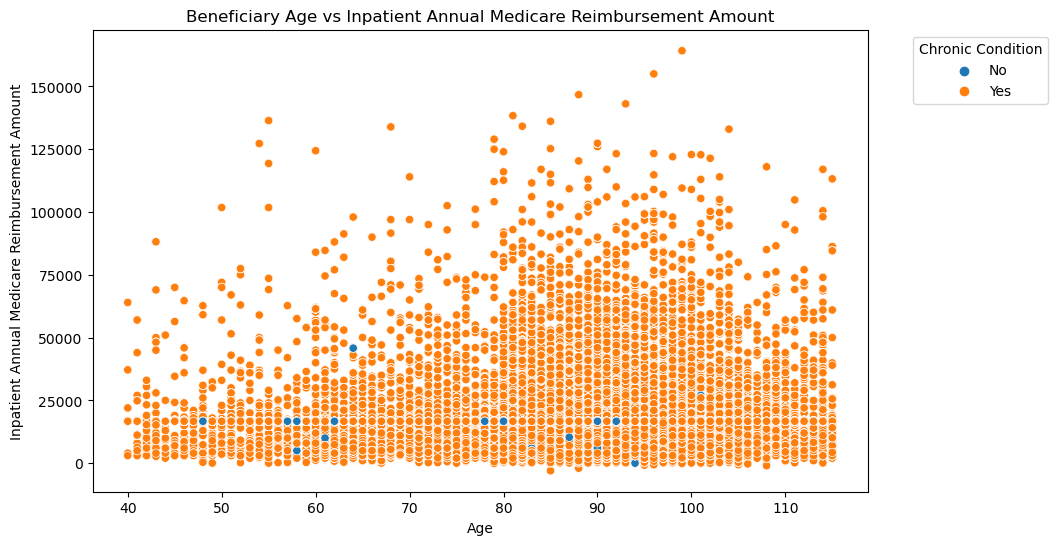

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Age', y='MEDREIMB_IP', hue='Chronic_Condition')
plt.title('Beneficiary Age vs Inpatient Annual Medicare Reimbursement Amount')
plt.xlabel('Age')
plt.ylabel('Inpatient Annual Medicare Reimbursement Amount')
plt.legend(title='Chronic Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

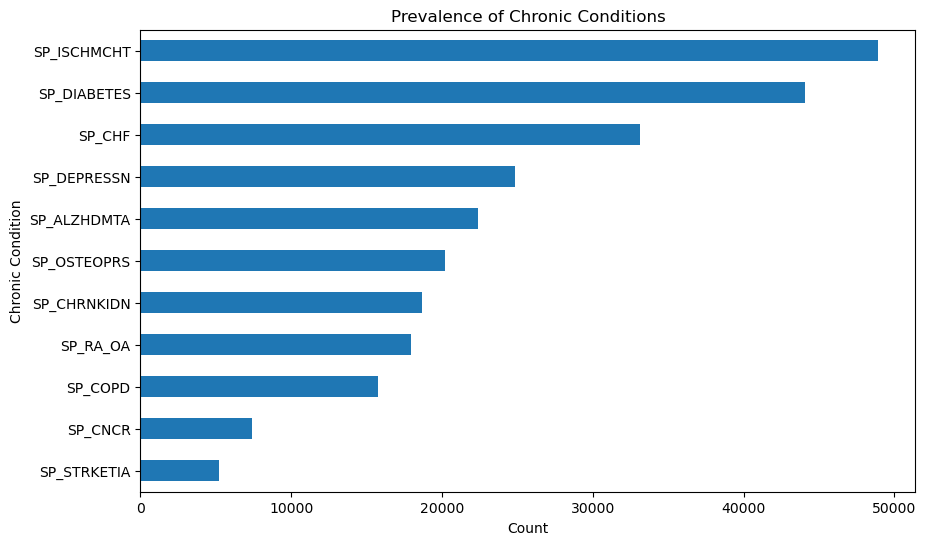

In [19]:
# Chronic Conditions Analysis
chronic_counts = beneficiary_data[chronic_conditions].apply(lambda x: (x == 1).sum())
plt.figure(figsize=(10, 6))
chronic_counts.sort_values().plot(kind='barh')
plt.title('Prevalence of Chronic Conditions')
plt.xlabel('Count')
plt.ylabel('Chronic Condition')
plt.show()

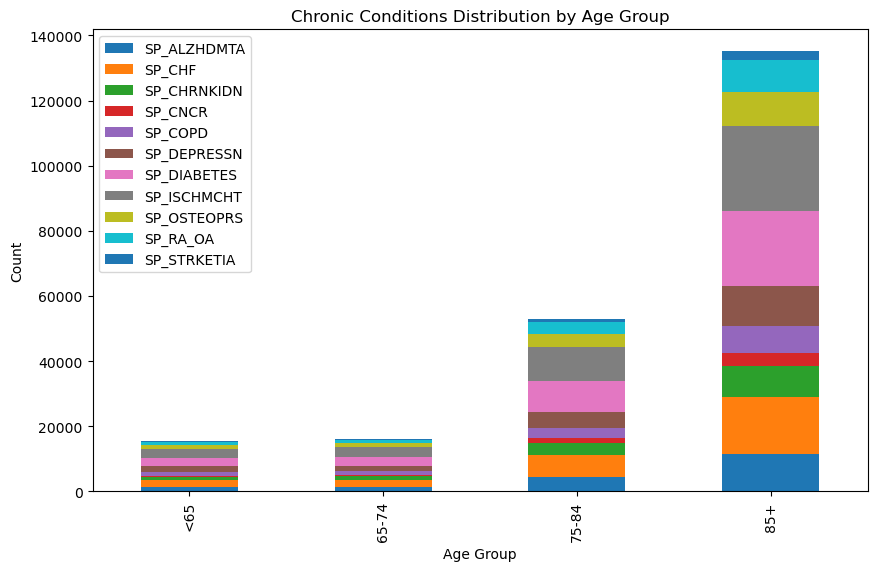

In [20]:
# Chronic conditions distribution by age group
beneficiary_data['Age_Group'] = pd.cut(beneficiary_data['Age'], bins=[0, 64, 74, 84, 100], labels=['<65', '65-74', '75-84', '85+'])
chronic_by_age = beneficiary_data.groupby('Age_Group')[chronic_conditions].apply(lambda x: (x == 1).sum()).reset_index()
chronic_by_age.set_index('Age_Group', inplace=True)
chronic_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Chronic Conditions Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#### Financial Analysis
#### Line Chart: Average claims amount over historical period

In [21]:
# Convert CLM_FROM_DT to datetime and handle errors
inpatient_data['CLM_FROM_DT'] = pd.to_datetime(inpatient_data['CLM_FROM_DT'], format='%Y%m%d', errors='coerce')

# Remove rows with na in CLM_FROM_DT
inpatient_data = inpatient_data.dropna(subset=['CLM_FROM_DT'])

# Extract year from claim dates
inpatient_data['Year'] = inpatient_data['CLM_FROM_DT'].dt.year

# Calculate the average claims amount per year
average_claims_per_year = inpatient_data.groupby('Year')['CLM_PMT_AMT'].mean().reset_index()
average_claims_per_year.rename(columns={'CLM_PMT_AMT': 'Claim Amount'})


,Year,Claim Amount
0,2007,12719.417051
1,2008,9686.088600
2,2009,9984.694387
3,2010,10055.150467


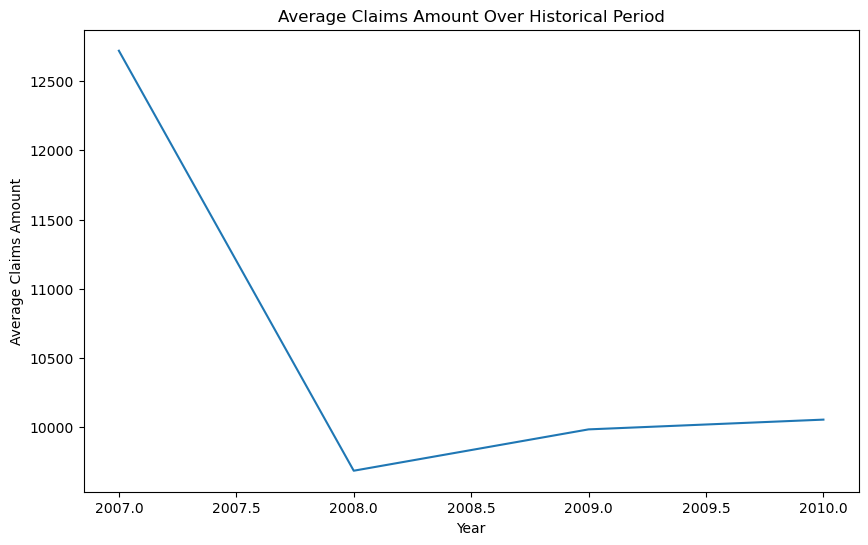

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_claims_per_year, x='Year', y='CLM_PMT_AMT')
plt.title('Average Claims Amount Over Historical Period')
plt.xlabel('Year')
plt.ylabel('Average Claims Amount')
plt.show()

In [23]:
# Average and total claim amounts
avg_claim_amount = inpatient_data['CLM_PMT_AMT'].mean()
total_claim_amount = inpatient_data['CLM_PMT_AMT'].sum()
print(f'Average Claim Amount: ${avg_claim_amount:.2f}')
print(f'Total Claim Amount: ${total_claim_amount:.2f}')

Average Claim Amount: $9884.31
Total Claim Amount: $659333035.90


In [24]:
# Average and total reimbursement amounts
avg_reimbursement_amount = merged_data['MEDREIMB_IP'].mean()
total_reimbursement_amount = merged_data['MEDREIMB_IP'].sum()
print(f'Average Reimbursement Amount: ${avg_reimbursement_amount:.2f}')
print(f'Total Reimbursement Amount: ${total_reimbursement_amount:.2f}')

Average Reimbursement Amount: $19772.53
Total Reimbursement Amount: $1320270971.16


#### Ratio of amount reimbursed by amount claimed by race for Texas

In [25]:
beneficiary_data['BENE_RACE_CD'].unique()

array([1, 5, 2, 3], dtype=int64)

We know Texas is 45


In [26]:
# Convert 'BENE_RACE_CD' to text
race_mapping = {
    1: 'White',
    2: 'Black',
    3: 'Other',
    5: 'Hispanic'
}
beneficiary_data['BENE_RACE_CD'] = beneficiary_data['BENE_RACE_CD'].map(race_mapping)

# Filter data for Texas with state_code 45
texas_data = beneficiary_data[beneficiary_data['SP_STATE_CODE'] == 45]

# Merge Texas beneficiary data with inpatient data
texas_merged_data = pd.merge(texas_data, inpatient_data, on='DESYNPUF_ID')

# Calculate the ratio of amount reimbursed by amount claimed
texas_merged_data['Reimbursement_Ratio'] = texas_merged_data['MEDREIMB_IP'] / texas_merged_data['CLM_PMT_AMT']

# Group by race and calculate the mean ratio
ratio_by_race = texas_merged_data.groupby('BENE_RACE_CD')['Reimbursement_Ratio'].mean().reset_index()


In [27]:
# Sort the table by Reimbursement_Ratio in ascending order
ratio_by_race.sort_values(by='Reimbursement_Ratio', ascending=True).rename(columns={'BENE_RACE_CD': 'Race'})

,Race,Reimbursement_Ratio
3,White,3.111813
0,Black,3.172441
1,Hispanic,3.297672
2,Other,5.250800


#### Table showing Claim amount by patient and visits

In [28]:
# Aggregate claim amount by patient and number of visits
claims_by_patient = inpatient_data.groupby('DESYNPUF_ID').agg({'CLM_PMT_AMT': 'sum', 'DESYNPUF_ID': 'count'}).rename(columns={'CLM_PMT_AMT': 'Claim_Amount', 'DESYNPUF_ID': 'Visits'}).reset_index()

# Rename DESYNPUF_ID to beneficiary_id
claims_by_patient.rename(columns={'DESYNPUF_ID': 'Beneficiary_Code'}, inplace=True)

# Display the table
print(claims_by_patient.head(10))


   Beneficiary_Code  Claim_Amount  Visits
0  00013D2EFD8E45D1        4000.0       1
1  00016F745862898F       52000.0       4
2  00052705243EA128       14000.0       1
3  0007F12A492FD25D       53000.0       4
4  000B97BA2314E971        2000.0       1
5  000C7486B11E7030       30000.0       1
6  00108066CA1FACCE       30000.0       1
7  0011714C14B52EEB        3000.0       1
8  0011CB1FE23E91AF       11000.0       2
9  00139C345A104F72       23000.0       2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


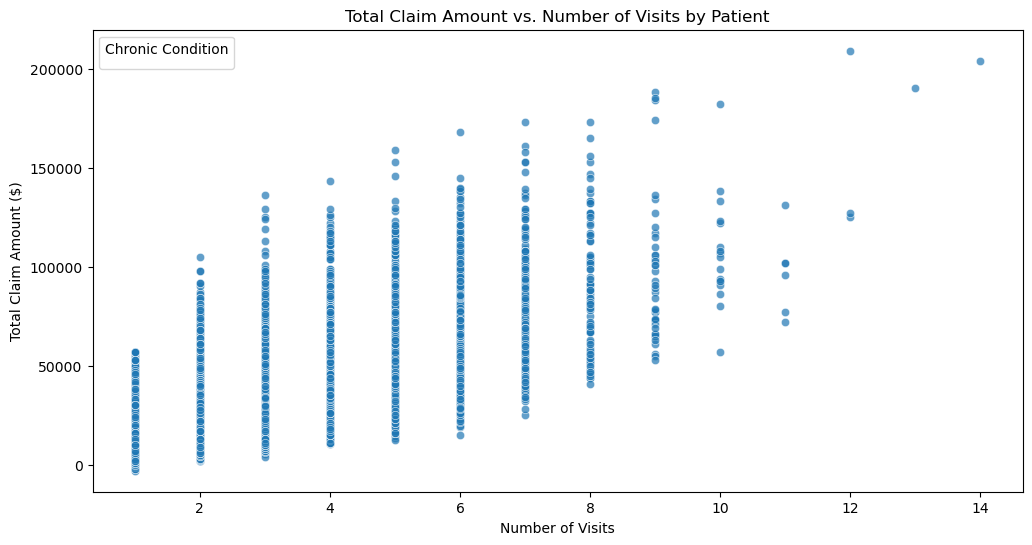

In [29]:
# Scatter plot of total claim amount vs. number of visits
plt.figure(figsize=(12, 6))
sns.scatterplot(data=claims_by_patient, x='Visits', y='Claim_Amount', alpha=0.7)
plt.title('Total Claim Amount vs. Number of Visits by Patient')
plt.xlabel('Number of Visits')
plt.ylabel('Total Claim Amount ($)')
plt.legend(title='Chronic Condition')
plt.show()


Objective

To determine whether the differences in reimbursement ratios among different racial groups are statistically significant.<br>
Methodology<br>

    Hypothesis Testing:
        Null Hypothesis (H0​): There is no significant difference in the reimbursement ratios between different racial groups.
        Alternative Hypothesis (H1): There is a significant difference in the reimbursement ratios between different racial groups.

In [31]:
merged_data['Reimbursement_Ratio'] = merged_data['MEDREIMB_IP'] / merged_data['CLM_PMT_AMT']
# Perform ANOVA test
model = ols('Reimbursement_Ratio ~ C(BENE_RACE_CD)', data=merged_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq       df         F    PR(>F)
C(BENE_RACE_CD)  4.058851e+02      3.0  0.587337  0.623238
Residual         1.538045e+07  66769.0       NaN       NaN


<li>The F-statistic (0.587337) is relatively low, suggesting minimal variation in reimbursement ratios explained by racial differences.<br>
<li>The p-value (0.623238) is greater than 0.05 (commonly used significance level). This indicates that we fail to reject the null hypothesis, which is that there's no statistically significant difference in reimbursement ratios based on race.<br>
<li>There is no significant difference in the reimbursement ratios between different racial groups.

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=merged_data['Reimbursement_Ratio'], groups=merged_data['BENE_RACE_CD'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.1686 0.8169 -0.6627 0.3255  False
     1      3  -0.2182 0.9172 -1.0868 0.6504  False
     1      5   -0.366 0.8256 -1.4598 0.7278  False
     2      3  -0.0496 0.9992 -1.0215 0.9223  False
     2      5  -0.1974 0.9732  -1.375 0.9802  False
     3      5  -0.1478 0.9927 -1.5251 1.2295  False
---------------------------------------------------


In [33]:
merged_data.groupby('BENE_RACE_CD')['Reimbursement_Ratio'].mean().reset_index()

,BENE_RACE_CD,Reimbursement_Ratio
0,1,3.361549
1,2,3.192934
2,3,3.143357
3,5,2.995551
